In [1]:

import numpy as np

light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12
frequency = 1e6 * 146
omega = 2 * np.pi * frequency
incident_voltage = 10

wavelength = light_speed / frequency
delta_r = light_speed / frequency / 1e2

antenna = np.array([[0.0,0.0,0.0],[0.0,0.0,wavelength]])
source_position = np.array([[0.0,0.0,wavelength/2]])
radius = 3.175e-3

In [ ]:
import geometry as gm
import matrix_elements as matrix
import EFIE_solver as efie
R_block, R = gm.calculate_positions(antenna, delta_r)
impedance = matrix.calculate_impedance(antenna, R_block, delta_r, radius, frequency)
voltage_block, voltage = matrix.calculate_voltage(R_block, incident_voltage, source_position, delta_r)
current_block, current, E_total, phi = efie.calculate_directional_pattern(antenna, source_position, incident_voltage, frequency, radius, delta_r)

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


In [3]:
gm.current_distribution_3d(R, current)

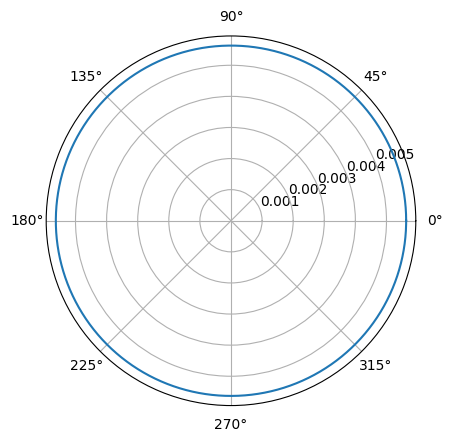

In [4]:
import matplotlib.pyplot as plt
plt.polar(phi, E_total)